In [10]:
import openpyxl
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn import svm
import datetime
import pylab

import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

wb1 = openpyxl.load_workbook(r"C:\Users\User\Desktop\Книга1.xlsx")
sheet = wb1['Лист4']
sheet1 = wb1['Лист5']
wb2 = openpyxl.load_workbook(r"C:\Users\User\Desktop\11111111111111.xlsx")
sheet2 = wb2['Отчет']

In [2]:
start = datetime.datetime.now()
def df_test(frame_col):
    print('Результат теста:')
    df_result = adfuller(frame_col)
    df_labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for result_value, label in zip(df_result, df_labels):
        print(label + ' : ' + str(result_value))

    if df_result[1] <= 0.05:
        print("Сильные доказательства против нулевой гипотезы, ряд является стационарным.")
    else:
        print("Слабые доказательства против нулевой гипотезы, ряд не является стационарным.")

In [3]:
def search_optimal_sarima(time_series, seasonal_cycle):
    order_vals = diff_vals = ma_vals = range(0, 2)
    pdq_combinations = list(itertools.product(order_vals, diff_vals, ma_vals))
    seasonal_combinations = [(combo[0], combo[1], combo[2], seasonal_cycle) for combo in pdq_combinations]
       
    smallest_aic = float("inf")
    optimal_order_param = optimal_seasonal_param = None

    for order_param in pdq_combinations:
        for seasonal_param in seasonal_combinations:
            try:
                sarima_model = SARIMAX(time_series,
                                                         order=order_param,
                                                         seasonal_order=seasonal_param,
                                                         enforce_stationarity=False,
                                                         enforce_invertibility=False)

                model_results = sarima_model.fit()
                if model_results.aic < smallest_aic:
                    smallest_aic = model_results.aic
                    optimal_order_param = order_param
                    optimal_seasonal_param = seasonal_param
            except:
                continue

    print('ARIMA{}x{} - AIC:{}'.format(optimal_order_param, optimal_seasonal_param, smallest_aic))

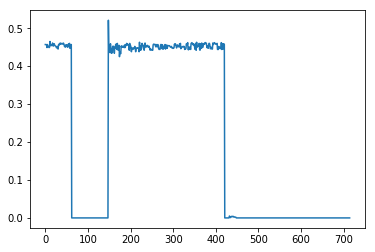

In [32]:
batch1 = []
batch2 = []
batch3 = []
timer = []
n = 18
num = 734
for i in range (1, num-n):
    timer.append(sheet2.cell(row = i+n, column = 1).value)
    batch1.append(float(sheet2.cell(row = i+n, column = 2).value))
    batch2.append(sheet.cell(row = i, column = 2).value)
    batch3.append(sheet.cell(row = i, column = 3).value)
plt.plot(batch1)
plt.show()
#plt.plot(batch2)
#plt.show()
#plt.plot(batch3)
#plt.show()
    

In [22]:
def modelling(df1, df2, df3):
    df1t = df1[100:]["flow1"]
    model1 = SARIMAX(df1t, order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
    #model2 = SARIMAX(df2, order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
    #model3 = SARIMAX(df3, order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))

    result1 = model1.fit()
    #result2 = model2.fit()
    #result3 = model3.fit()

    prog_start = 0

    pred1 = result1.get_prediction(start = prog_start, dynamic = False)
    forecast_values1 = pred1.predicted_mean
    #pred2 = result2.get_prediction(start = prog_start, dynamic = False)
    #forecast_values2 = pred2.predicted_mean
    #pred3 = result3.get_prediction(start = prog_start, dynamic = False)
    #forecast_values3 = pred3.predicted_mean

    #print(result1.summary())
    #print(result2.summary())
    #print(result3.summary())

    act_values1 = df1[prog_start:]["flow1"]
    #act_values2 = df2[prog_start:]["flow2"]
    #act_values3 = df3[prog_start:]["flow_air"]

    forecast_mse1 = ((forecast_values1 - act_values1) ** 2).mean()
    
    pylab.subplot(1,2,2)
    pylab.plot(act_values1, label = "истинные значения")
    pylab.plot(forecast_values1, label = "прогноз")
    pylab.set_title('График значений ')
    pylab.legend()
    #forecast_mse2 = ((forecast_values2 - act_values2) ** 2).mean()
    #forecast_mse3 = ((forecast_values3 - act_values3) ** 2).mean()

In [33]:
def fail_checker(df1):
    
    res_svm_t1 = []
    #res_svm_t2 = []
    #res_svm_t3 = []
    for i in range (1, num-n):
        res_svm_t1.append(sheet1.cell(row = i, column = 1).value)
        #res_svm_t2.append(sheet1.cell(row = i, column = 2).value)
        #res_svm_t3.append(sheet1.cell(row = i, column = 3).value)


    model_svm_1 = svm.SVC(kernel = 'linear')
    
    model_svm_1.fit(df1, df1)
    pred1 = model_svm_1.predict(df1)
    accuracy = model_svm_1.score(df1, res_svm_t1)
    
    if (accuracy > 0.95):
        print("warning!. Breakdown detected")
        sheet.cell(row = 1, column = 4).value = 1
        wb1.save(r"C:\Users\User\Desktop\Книга1.xlsx")
    
    
    

C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


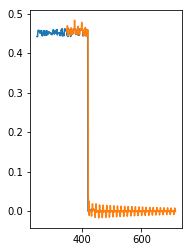

C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: 'continuous'

In [34]:
df1 =  pd.DataFrame(columns = ["flow1"])
df1.flow1 = batch1
df2 =  pd.DataFrame(columns = ["flow2"])
df2.flow2 = batch2
df3 =  pd.DataFrame(columns = ["flow_air"])
df3.flow_air = batch3

modelling(df1, df2, df3)
fail_checker(df1)
#fail_checker(df2)
#fail_checker(df3)

In [ ]:
finish = datetime.datetime.now()
print('Время окончания: ' + str(finish))

# вычитаем время старта из времени окончания
print('Время работы: ' + str(finish - start))